In [3]:
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import timm
from torchvision.transforms.functional import to_pil_image
from torchvision.models import EfficientNet_B0_Weights
import os

In [11]:
weights = EfficientNet_B0_Weights.IMAGENET1K_V1
preprocess = weights.transforms()

print(preprocess)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)


In [5]:
data_dir = '../../../dataset'
images_dir = os.path.join(data_dir, 'tiles')

Shape após transformação: torch.Size([3, 224, 224])


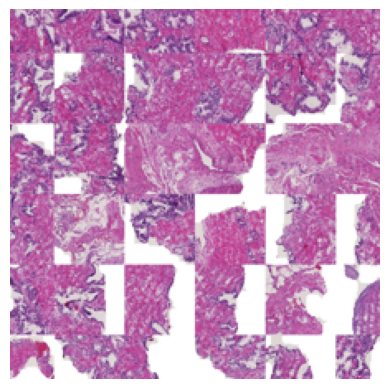

In [14]:

img = Image.open(f"{images_dir}/0ab859bbba82de5373f3f2fa8e806e2d.jpg").convert("RGB")

img_tensor = preprocess(img)  # saída: Tensor (C, H, W)
print("Shape após transformação:", img_tensor.shape)

mean = torch.tensor(preprocess.mean).view(3,1,1)
std = torch.tensor(preprocess.std).view(3,1,1)
img_denorm = img_tensor * std + mean  # desfaz a normalização

img_pil = to_pil_image(img_denorm)
plt.imshow(img_pil)
plt.axis('off')
plt.show()
